# Welcome to Jie's AI Jupyte Notebook  <a href="https://colab.research.google.com/github/profmcnich/example_notebook/blob/main/student_survey_analysis.ipynb\" target="_parent\"> <img src="https://colab.research.google.com/assets/colab-badge.svg\" alt="Open In Colab\"/></a>

# Below is a part of the program for Stochastical Forest Fire Model Using Cellular Automaton
## It is a simulation of how fire will spread in a forest containing two tree species Pine and Ork under wind factor. The forest is a 100*100 grid and filled with  Pines and Orks of different densities.
## The program starts with randomly igniting a tree site and ends when the forest is burned out or there is no burning trees.

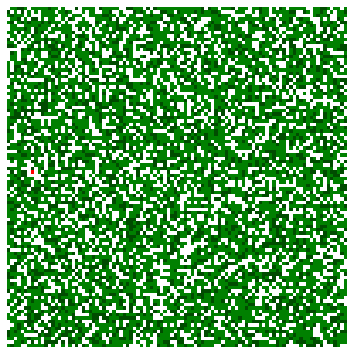

MovieWriter ffmpeg unavailable; using Pillow instead.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib import animation
from matplotlib import colors


# Grid size
M = N = 100
# Density of the forest
d = 0.7
# Density of Pine
d_pine = 0.7
# Wetness of trees
wetness = 1.0

probCatch_Pine = 1.0/wetness
probCatch_Oak = 0.5/wetness
p_w = 0.3 
# Empty = 0, Pine = 1, Ork = 2, Fire = 3, Burned = 4

# specify M,N,d where d is the density of the forest
grid = np.zeros([M,N])

# create lists for empty sites and trees
Empty =[]
Pine = []
Oak =[]
Burn=[]
# fill the list of empty sites with all cells
for n in range(N):
    for m in range(M):
        Empty.append((m,n))

# keep track of the number of empty sites, trees, and fires
nEmpty = M*N
nPine = 0
nOak = 0
nBurn = 0

# put trees at random locations
for i in range(math.floor(d*M*N)):
    j = random.randrange(nEmpty)
    rand_pine = random.uniform(0.0,1)
    if rand_pine <= d_pine:
        Pine.append(Empty.pop(j))
        nEmpty -= 1
        nPine += 1
    else: 
        Oak.append(Empty.pop(j))
        nEmpty -= 1
        nOak += 1


# populate the intial grid
for i in range(nPine):
    mn = Pine[i]
    grid[mn[0],mn[1]] = 1

for i in range(nOak):
    mn = Oak[i]
    grid[mn[0],mn[1]] = 2



# pick a random tree and set it on fire
if nPine >= 0 and nOak >= 0:
    p = np.random.random()
    if p <= d_pine:
        j = random.randrange(nPine)
        mn = Pine[j]
        grid[mn[0],mn[1]] = 3
        Burn.append(Pine.pop(j))
        nPine -= 1
        nBurn = 1
    else:    
        j = random.randrange(nOak)
        mn = Oak[j]
        grid[mn[0],mn[1]] = 3
        Burn.append(Oak.pop(j))
        nOak -= 1
        nBurn = 1


# Moore Neighbourhoods
neighbours = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))


# Update the forest based on fire spreading rules
def update(grid):
    new_grid = np.zeros([M,N])
    p = 0
    for x in range(M):
        for y in range(N):
            state = grid[y,x]
            if state == 3:
                state = 4
            # Pine cell
            elif state == 1:
                for dx,dy in neighbours:
                    if y+dy<0 or y+dy>99 or x+dx<0 or x+dx>99:
                       pass
                    else:
                        # Consider that the neighbours at wind direction has higher probability of catching fire 
                        if dx == 1:
                            p = probCatch_Pine
                        # Probability for a Pine to catch fire
                        if grid[y+dy,x+dx] == 3 and np.random.random() < p:
                            state = 3
                            break
            # Oak cell
            elif state == 2:
                 p = probCatch_Oak
                 for dx,dy in neighbours:
                    if y+dy<0 or y+dy>99 or x+dx<0 or x+dx>99:
                       pass
                    else:
                        # Consider that the neighbours at wind direction has higher probability of catching fire 
                        if dx == 1:
                            p = probCatch_Oak+(1.0-probCatch_Oak)*p_w                       
                        # Probability for a Oak to catch fire
                        if grid[y+dy,x+dx] == 3 and np.random.random() < p:
                            state = 3
                            break
            new_grid[y,x] = state
            
    grid = new_grid
    return new_grid


# Set up the animation
# Empty=0 - white, Pine=1 - green, Oak=2 - darkgreen, fire=3 - red, burned=4 - grey
colors_list = ['white', 'green', (0,0.3,0), (1,0,0),(1,0,0),'grey']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3,4,5]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Plot the grid
fig = plt.figure(figsize=(8.5, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(grid, cmap=cmap, norm=norm)

# Animate the updating grid
def animate(i):
    im.set_data(animate.grid)
    animate.grid = update(animate.grid)
animate.grid = grid

# FuncAnimation will call the animagte function for each frame; here we
# animating over 200 frames, with an interval of 300 ms between frames.
anim = animation.FuncAnimation(fig, animate, interval=300, frames=200)
plt.show()
anim.save("forest_fire.gif")



## After running the above program, a gif file will be produced and saved under the file location where this .ipynb file located.

## Thank you for watching my note book.

<img src ="https://i.imgflip.com/22bjx7.jpg">